# 📝 Exercise M7.01

In this exercise we will define dummy classification baselines and use them
as reference to assess the relative predictive performance of a given model
of interest.

We illustrate those baselines with the help of the Adult Census dataset,
using only the numerical features for the sake of simplicity.

In [1]:
import pandas as pd

adult_census = pd.read_csv("../datasets/adult-census-numeric-all.csv")
data, target = adult_census.drop(columns="class"), adult_census["class"]

First, define a `ShuffleSplit` cross-validation strategy taking half of the
samples as a testing at each round. Let us use 10 cross-validation rounds.

In [4]:
from sklearn.model_selection import ShuffleSplit

shuffle = ShuffleSplit(n_splits=10, test_size=0.5, random_state=0)

Next, create a machine learning pipeline composed of a transformer to
standardize the data followed by a logistic regression classifier.

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model_logistic = make_pipeline(StandardScaler(), LogisticRegression())

Compute the cross-validation (test) scores for the classifier on this
dataset. Store the results pandas Series as we did in the previous notebook.

In [9]:
from sklearn.model_selection import cross_validate

cv_logistic = cross_validate(model_logistic, data, target, cv=shuffle, n_jobs=2, return_estimator=True)
cv_log_series = pd.Series(cv_logistic['test_score'], name="Logistic")

Now, compute the cross-validation scores of a dummy classifier that
constantly predicts the most frequent class observed the training set. Please
refer to the online documentation for the [sklearn.dummy.DummyClassifier
](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)
class.

Store the results in a second pandas Series.

In [26]:
from sklearn.dummy import DummyClassifier

dumdum = DummyClassifier(strategy='most_frequent')
cv_dumdum = cross_validate(dumdum, data, target, cv=shuffle, n_jobs=2, return_estimator=True)
cv_dum_series = pd.Series(cv_dumdum['test_score'], name="Most Frequent Dummy")

In [11]:
dumdum.get_params()

{'constant': None, 'random_state': None, 'strategy': 'most_frequent'}

Now that we collected the results from the baseline and the model,
concatenate the test scores as columns a single pandas dataframe.

In [13]:
log_vs_dum = pd.concat([cv_dum_series, cv_log_series], axis=1)
log_vs_dum

,Dummy,Logistic
0,0.760329,0.815937
1,0.756808,0.813849
2,0.759142,0.815036
3,0.760739,0.815569
4,0.761681,0.810982
5,0.761885,0.814709
6,0.757463,0.813112
7,0.757176,0.810327
8,0.761885,0.812416
9,0.763114,0.816388



Next, plot the histogram of the cross-validation test scores for both
models with the help of [pandas built-in plotting
function](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#histograms).

What conclusions do you draw from the results?

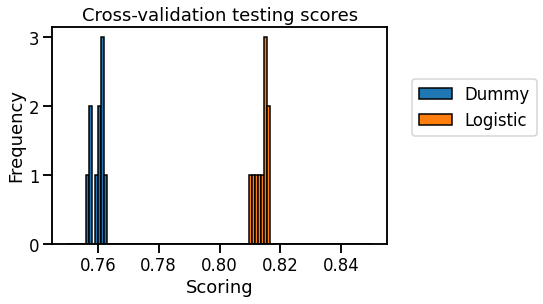

In [20]:
import matplotlib.pyplot as plt
import numpy as np

bins = np.linspace(start=0.75, stop=0.85, num=100)
log_vs_dum.plot.hist(bins=bins, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Scoring")
_ = plt.title("Cross-validation testing scores")

Change the `strategy` of the dummy classifier to `"stratified"`, compute the
results. Similarly compute scores for `strategy="uniform"` and then the  plot
the distribution together with the other results.

Are those new baselines better than the previous one? Why is this the case?

Please refer to the scikit-learn documentation on
[sklearn.dummy.DummyClassifier](
https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)
to find out about the meaning of the `"stratified"` and `"uniform"`
strategies.

In [22]:
dumdum2 = DummyClassifier(strategy='stratified')
dumdum3 = DummyClassifier(strategy='uniform')

cv_dum2 = cross_validate(dumdum2, data, target, cv=shuffle, n_jobs=2)
cv_dum3 = cross_validate(dumdum3, data, target, cv=shuffle, n_jobs=2)

series_cv_dum2 = pd.Series(cv_dum2['test_score'], name="Stratified Dummy")
series_cv_dum3 = pd.Series(cv_dum3['test_score'], name="Uniform Dummy")

In [27]:
log_vs_all_dum = pd.concat([cv_dum_series, cv_log_series, series_cv_dum2, series_cv_dum3], axis=1)
log_vs_all_dum

,Most Frequent Dummy,Logistic,Stratified Dummy,Uniform Dummy
0,0.760329,0.815937,0.637034,0.498464
1,0.756808,0.813849,0.637075,0.502232
2,0.759142,0.815036,0.634945,0.495434
3,0.760739,0.815569,0.639900,0.503911
4,0.761681,0.810982,0.632734,0.493141
5,0.761885,0.814709,0.637402,0.502191
6,0.757463,0.813112,0.636297,0.494206
7,0.757176,0.810327,0.637607,0.497891
8,0.761885,0.812416,0.633471,0.494533
9,0.763114,0.816388,0.637689,0.496253


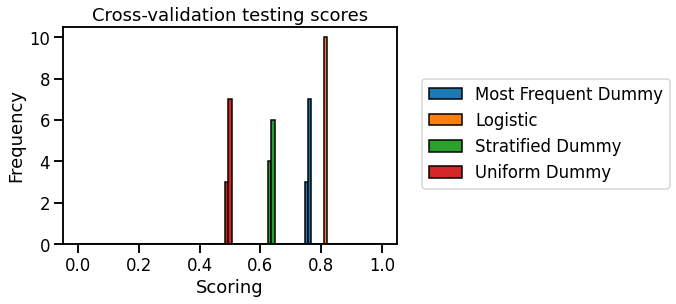

In [28]:
bins = np.linspace(start=0, stop=1, num=100)
log_vs_all_dum.plot.hist(bins=bins, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Scoring")
_ = plt.title("Cross-validation testing scores")

In [29]:
cv_logistic

{'fit_time': array([0.1237359 , 0.09348917, 0.0792079 , 0.07769608, 0.08464003,
        0.08623409, 0.09121275, 0.10052824, 0.0752027 , 0.08164191]),
 'score_time': array([0.07013416, 0.08044386, 0.070611  , 0.070508  , 0.07185102,
        0.08010912, 0.08031726, 0.07028985, 0.07000017, 0.06852412]),
 'estimator': [Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('logisticregression', LogisticRegression())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('logisticregression', LogisticRegression())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('logisticregression', LogisticRegression())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('logisticregression', LogisticRegression())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('logisticregression', LogisticRegression())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  (